# **Random Forest**

# Import Libraries

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Load and Prepare the Dataset

In [25]:
#uploaded = files.upload()
file_path = '/content/ev_data_normalized.csv'
normalized_df = pd.read_csv(file_path)

In [26]:
exclude_columns = ['Electric Vehicle Type']
feature_columns = [col for col in normalized_df.columns if col not in exclude_columns]

X = normalized_df[feature_columns]
y = normalized_df['Electric Vehicle Type']

# Split Data into Training and Testing Sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model

In [28]:
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

# Make Predictions and Calculate Metrics

In [29]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Classification Accuracy
accuracy = rf_model.score(X_test, y_test)
print(f"CA (Classification Accuracy): {accuracy:.8f}")

# F1 Score for each class
f1 = f1_score(y_test, y_pred, average=None)
print(f"\nF1 Scores per Class: {f1}")

# Precision and Recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print(f"\nPrecision for each class: {precision}")
print(f"Recall for each class: {recall}")
print(f"F1 Score for each class: {f1}")

# Recall for each class
print("\nRC (Recall) for each class:")
for i, class_name in enumerate(np.unique(y)):
    print(f"{class_name}: {recall[i]:.8f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=8))

CA (Classification Accuracy): 0.99995459

F1 Scores per Class: [0.99997128 0.99989162]

Precision for each class: [1.         0.99978327]
Recall for each class: [0.99994256 1.        ]
F1 Score for each class: [0.99997128 0.99989162]

RC (Recall) for each class:
0.0: 0.99994256
1.0: 1.00000000

Classification Report:
              precision    recall  f1-score   support

         0.0  1.00000000 0.99994256 0.99997128     34819
         1.0  0.99978327 1.00000000 0.99989162      9226

    accuracy                      0.99995459     44045
   macro avg  0.99989163 0.99997128 0.99993145     44045
weighted avg  0.99995460 0.99995459 0.99995459     44045



# Predictions vs Actual Values

In [30]:
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nPredictions vs Actual values:")
print(predictions_df.head())


Predictions vs Actual values:
        Actual  Predicted
9760       0.0        0.0
107132     0.0        0.0
10036      0.0        0.0
128302     0.0        0.0
13359      0.0        0.0


# Confusion Matrix Visualization

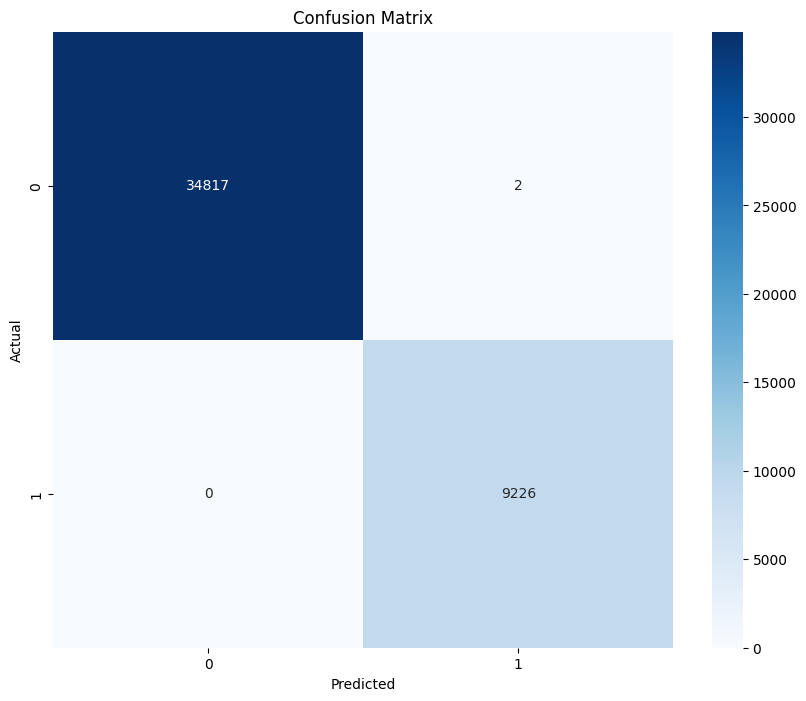

In [31]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Results Table

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define parameter combinations
param_combinations = [
    {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2},
    {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5},
    {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 3},
    {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 4},
    {'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10},
    {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 6},
    {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 8},
    {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 4},
    {'n_estimators': 250, 'max_depth': 20, 'min_samples_split': 5},
    {'n_estimators': 180, 'max_depth': None, 'min_samples_split': 3},
    {'n_estimators': 120, 'max_depth': 15, 'min_samples_split': 7},
    {'n_estimators': 220, 'max_depth': 25, 'min_samples_split': 4}
]

# Perform training and evaluation for each parameter combination
for i, params in enumerate(param_combinations, 1):
    print(f"\nTraining model {i}/12 with parameters: {params}")

    # Train model
    rf = RandomForestClassifier(**params, random_state=42)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Print the classification report
    print(f"\nClassification Report for Model {i}:")
    print(classification_report(y_test, y_pred, digits=8))



Training model 1/12 with parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}

Classification Report for Model 1:
              precision    recall  f1-score   support

         0.0  1.00000000 0.99997128 0.99998564     34819
         1.0  0.99989162 1.00000000 0.99994581      9226

    accuracy                      0.99997730     44045
   macro avg  0.99994581 0.99998564 0.99996572     44045
weighted avg  0.99997730 0.99997730 0.99997730     44045


Training model 2/12 with parameters: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5}

Classification Report for Model 2:
              precision    recall  f1-score   support

         0.0  0.99997128 0.99988512 0.99992820     34819
         1.0  0.99956658 0.99989161 0.99972907      9226

    accuracy                      0.99988648     44045
   macro avg  0.99976893 0.99988837 0.99982863     44045
weighted avg  0.99988651 0.99988648 0.99988649     44045


Training model 3/12 with parameters: {'n_es